In [11]:
"""
Simon Wang

This project utalizes Multiple Linear Regression to calibrate control of robot 
arms. The robot data for the project is taken generously from the TU Dortmund's
Multiple Link Robot Arms Project.
https://rst.etit.tu-dortmund.de/
"""

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

# load data
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]
df = pd.read_csv('https://raw.githubusercontent.com/ssw8/ML_Portfolio/main/robot_cali_exp1.csv',
                 names=names, index_col='t')

y = df.pop('I2')
t = df.index
ytrain = y
Xtrain = df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]

# train model and test with the same data
regr = linear_model.LinearRegression()
regr.fit(Xtrain, ytrain)
ytrain_pred = regr.predict(Xtrain)


The normalized RSS is  0.09583263861233178


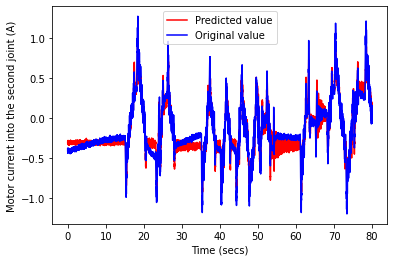

In [12]:
# display accuracy
plt.plot(t, ytrain_pred, '-r', label='Predicted value')
plt.plot(t, y, '-b', label='Original value')
plt.legend()
plt.xlabel('Time (secs)')
plt.ylabel('Motor current into the second joint (A)')
RSS_train = np.mean((ytrain_pred-ytrain)**2)/(np.std(ytrain)**2)
print('The normalized RSS is ', RSS_train)

In [13]:
# load testing data
df2 = pd.read_csv('https://raw.githubusercontent.com/ssw8/ML_Portfolio/main/robot_cali_exp2.csv',
                 names=names, index_col='t')
Xtest = df2[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
ytest = df2.pop('I2')
t2 = df2.index

The normalized RSS for testing set is  0.12678048804762432


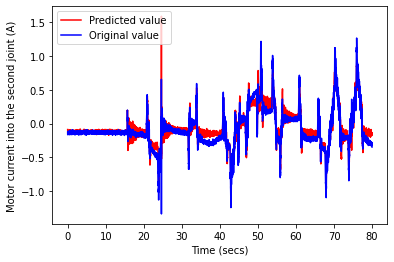

In [14]:
# display accuracy
ytest_pred = regr.predict(Xtest)
plt.plot(t2, ytest_pred, '-r', label='Predicted value')
plt.plot(t2, ytest, '-b', label='Original value')
plt.legend()
plt.xlabel('Time (secs)')
plt.ylabel('Motor current into the second joint (A)')
RSS_test = np.mean((ytest_pred-ytest)**2)/(np.std(ytest)**2)
print('The normalized RSS for testing set is ', RSS_test)